In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_sentimen = pd.read_csv('data/Text_Preprocessing.csv')
df_sentimen.head()

,Unnamed: 0,no,judul,judul_tokens,judul_tokens_fdist,judul_tokens_WSW,judul_tokens_stemmed
0,0,3,usaha kerajinan gerabah untuk meningkatakan pe...,"['usaha', 'kerajinan', 'gerabah', 'untuk', 'me...",<FreqDist with 19 samples and 19 outcomes>,"['usaha', 'kerajinan', 'gerabah', 'meningkatak...","['usaha', 'rajin', 'gerabah', 'meningkatakan',..."
1,1,3,peranan industri gerabah keramik sebagai suatu...,"['peranan', 'industri', 'gerabah', 'keramik', ...",<FreqDist with 18 samples and 18 outcomes>,"['peranan', 'industri', 'gerabah', 'keramik', ...","['peran', 'industri', 'gerabah', 'keramik', 's..."
2,2,3,industri kerajinan gerabah dan peranannya seba...,"['industri', 'kerajinan', 'gerabah', 'dan', 'p...",<FreqDist with 17 samples and 17 outcomes>,"['industri', 'kerajinan', 'gerabah', 'peranann...","['industri', 'rajin', 'gerabah', 'peran', 'sum..."
3,3,3,peranan industri kecil warangka keris dalam me...,"['peranan', 'industri', 'kecil', 'warangka', '...",<FreqDist with 9 samples and 9 outcomes>,"['peranan', 'industri', 'warangka', 'keris', '...","['peran', 'industri', 'warangka', 'keris', 'ti..."
4,4,3,bimbingan agama islam terhadap remaja dalam ke...,"['bimbingan', 'agama', 'islam', 'terhadap', 'r...",<FreqDist with 14 samples and 14 outcomes>,"['bimbingan', 'agama', 'islam', 'remaja', 'kel...","['bimbing', 'agama', 'islam', 'remaja', 'kelua..."


In [3]:
x = df_sentimen['judul_tokens_stemmed']
y = df_sentimen['no']
print('\nJumlah Judul Buku : ')
print(x)
# print('\nJumlah klasifikasi Buku : ')
# print (y.value_counts())


Jumlah Judul Buku : 
0        ['usaha', 'rajin', 'gerabah', 'meningkatakan',...
1        ['peran', 'industri', 'gerabah', 'keramik', 's...
2        ['industri', 'rajin', 'gerabah', 'peran', 'sum...
3        ['peran', 'industri', 'warangka', 'keris', 'ti...
4        ['bimbing', 'agama', 'islam', 'remaja', 'kelua...
                               ...                        
40131                       ['angel', 'in', 'the', 'rain']
40132                           ['the', 'hunger', 'games']
40133                        ['marrying', 'mr', 'perfect']
40134              ['bad', 'boy', 'for', 'little', 'girl']
40135    ['tinjau', 'yuridis', 'laksana', 'program', 'j...
Name: judul_tokens_stemmed, Length: 40136, dtype: object


In [4]:
# Membagi dataset menjadi data training dan data testing
# 8:2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y , random_state = 42)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# convert data menjadi tfidf
vectorizer = TfidfVectorizer() 
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [6]:
# Balancing data menggunakan smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [7]:
x_train_smote, y_train_smote = smote.fit_resample(
    x_train.astype('float'), # data training 80%
    y_train
)

In [8]:
from collections import Counter
print("Before SMOTE : \n", Counter(y_train))
print("After  SMOTE : \n", Counter(y_train_smote))

Before SMOTE : 
 Counter({6: 6988, 3: 6862, 8: 5922, 2: 3960, 7: 2098, 1: 1813, 5: 1312, 0: 1159, 9: 1158, 4: 836})
After  SMOTE : 
 Counter({6: 6988, 7: 6988, 8: 6988, 9: 6988, 3: 6988, 2: 6988, 1: 6988, 5: 6988, 0: 6988, 4: 6988})


In [9]:
from sklearn.pipeline import Pipeline

In [10]:
# Multinomial Naive Bayes 
from sklearn.naive_bayes import MultinomialNB

# Model MultinomialNB Menggunakan data training setelah di over sampling
# model_smote = MultinomialNB()
model_smote = Pipeline([
    # ('pre_processing', TfidfVectorizer(analyzer='char', lowercase=False)),
    ('naive_bayes', MultinomialNB())
])

In [11]:
model_smote.fit(
    x_train_smote, # data training 80%
    y_train_smote
)

y_pred_smote = model_smote.predict(
    x_test # data uji 20%
)
print(y_pred_smote)

[5 6 9 ... 8 3 8]



================= confusion matrix ===================== 


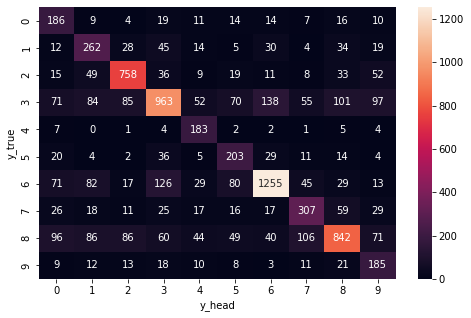


accuracy score hasil prediksi adalah: 
64.07573492775288
precision score hasil prediksi adalah: 
64.07573492775288
recall score hasil prediksi adalah: 
64.07573492775288

accuracy nb adalah:  0.6407573492775287
              precision    recall  f1-score   support

           0       0.36      0.64      0.46       290
           1       0.43      0.58      0.49       453
           2       0.75      0.77      0.76       990
           3       0.72      0.56      0.63      1716
           4       0.49      0.88      0.63       209
           5       0.44      0.62      0.51       328
           6       0.82      0.72      0.76      1747
           7       0.55      0.58      0.57       525
           8       0.73      0.57      0.64      1480
           9       0.38      0.64      0.48       290

    accuracy                           0.64      8028
   macro avg       0.57      0.66      0.59      8028
weighted avg       0.68      0.64      0.65      8028




In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

print("\n================= confusion matrix ===================== ")
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()
print("\n=========================================== ")
# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, y_pred_smote) * 100)

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test, y_pred_smote, average='micro') * 100)

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test, y_pred_smote, average='micro') * 100)

print("\n============================================================================= ")
print("accuracy nb adalah: ", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))
print("\n============================================================================= ")

In [19]:

#tes uji data baru
judul = ["matematika dasar fisika biollogi"]
judul_asli = judul
judul2 = ["ekonomi indonesia sedang dalam tumbuh yang bangga"]
judul_asli2 = judul2
#merubah ke bentuk number agar bisa di baca algoritma atau ML
judul = vectorizer.transform(judul)
judul2 = vectorizer.transform(judul2)

print(judul2)

  (0, 18003)	0.3931796997135077
  (0, 6733)	0.28647632192714517
  (0, 4384)	0.3688166442618339
  (0, 3471)	0.5461370350486682
  (0, 1516)	0.5736285057177511


In [14]:
prediksi2 = model_smote.predict(judul2)
print(prediksi2)
if prediksi2 == 0:
    print(judul_asli2, "Umum")
if prediksi2 == 1:
    print(judul_asli2, "Filsafat dan Psikologi")   
if prediksi2 == 2:
    print(judul_asli2, "Agama")
if prediksi2 == 3:
    print(judul_asli2, "Sosial")
if prediksi2 == 4:
    print(judul_asli2, "Bahasa")
if prediksi2 == 5:
    print(judul_asli2, "Sains dan Matematika")
if prediksi2 == 6:
    print(judul_asli2, "Teknologi")
if prediksi2 == 7:
    print(judul_asli2, "Seni dan Rekreasi")
if prediksi2 == 8:
    print(judul_asli2, "Literartur dan Sastra")
if prediksi2 == 9:
    print(judul_asli2, "Sejarah dan Geografi")

[3]
['ekonomi indonesia sedang dalam tumbuh yang bangga'] Sosial


In [23]:
# saving pocket module
import joblib

In [21]:
joblib.dump(model_smote, 'models/judul_model_nb.pkl')

['models/judul_model_nb.pkl']

In [22]:
joblib.dump(vectorizer, 'models/judul_model_tfid.pkl')

['models/judul_model_tfid.pkl']